# Football Data Analytics
## Install new Python libraries

In [11]:
%pip install nfl-data-py


[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


## Import Python libraries

In [12]:
import httpx
import pandas as pd
import nfl_data_py as nfl

## Setup notebook variables

In [13]:
base_url = "http://0.0.0.0:8000"

HEALTH_CHECK_ENDPOINT = "/"
LIST_LEAGUES_ENDPOINT = "/v0/leagues/"
LIST_PLAYERS_ENDPOINT = "/v0/players/"
LIST_PERFORMANCES_ENDPOINT = "/v0/performances/"
LIST_TEAMS_ENDPOINT = "/v0/teams/"
GET_COUNTS_ENDPOINT = "/v0/counts/"


## Create reusable function to call APIs

In [14]:
def call_api_endpoint(
    api_endpoint: str, 
    api_params: dict = None
) -> httpx.Response:
    with httpx.Client(base_url=base_url) as client:
        response = client.get( api_endpoint, params=api_params)
        response.raise_for_status()
        return response


## Gathering league information

In [15]:
league_api_response = call_api_endpoint(LIST_LEAGUES_ENDPOINT)
league_data = league_api_response.json()
display(league_data)

[{'league_id': 5001,
  'league_name': 'Pigskin Prodigal Fantasy League',
  'scoring_type': 'PPR',
  'last_changed_date': '2024-04-25',
  'teams': [{'league_id': 5001,
    'team_id': 1007,
    'team_name': 'Checkers Not Chess',
    'last_changed_date': '2024-04-23'},
   {'league_id': 5001,
    'team_id': 1003,
    'team_name': 'Dallas Steers',
    'last_changed_date': '2024-04-23'},
   {'league_id': 5001,
    'team_id': 1008,
    'team_name': 'Defending Champs',
    'last_changed_date': '2024-04-23'},
   {'league_id': 5001,
    'team_id': 1011,
    'team_name': 'Double Option',
    'last_changed_date': '2024-04-23'},
   {'league_id': 5001,
    'team_id': 1005,
    'team_name': 'Fighting Catfish',
    'last_changed_date': '2024-04-23'},
   {'league_id': 5001,
    'team_id': 1010,
    'team_name': 'Fumblerooski',
    'last_changed_date': '2024-04-23'},
   {'league_id': 5001,
    'team_id': 1004,
    'team_name': 'Never Gonna Give Up',
    'last_changed_date': '2024-04-23'},
   {'league_id

In [16]:
print(type(league_data))
print(type(league_data[0]))
print(len(league_data))

<class 'list'>
<class 'dict'>
5


## Get all the team rosters for the Pigskin Prodigal Fantasy League (league_id = 5001)

In [17]:
team_api_parameters = {'league_id': '5001'}
team_api_response = call_api_endpoint(LIST_TEAMS_ENDPOINT, team_api_parameters)
team_data = team_api_response.json()
display(team_data)

[{'league_id': 5001,
  'team_id': 1001,
  'team_name': 'Roaring Kitties',
  'last_changed_date': '2024-04-23',
  'players': [{'player_id': 1001,
    'gsis_id': '00-0023459',
    'first_name': 'Aaron',
    'last_name': 'Rodgers',
    'position': 'QB',
    'last_changed_date': '2024-04-18'},
   {'player_id': 1002,
    'gsis_id': '00-0023853',
    'first_name': 'Matt',
    'last_name': 'Prater',
    'position': 'K',
    'last_changed_date': '2024-04-18'},
   {'player_id': 1003,
    'gsis_id': '00-0024243',
    'first_name': 'Marcedes',
    'last_name': 'Lewis',
    'position': 'TE',
    'last_changed_date': '2024-04-18'},
   {'player_id': 1007,
    'gsis_id': '00-0026293',
    'first_name': 'Matt',
    'last_name': 'Slater',
    'position': 'WR',
    'last_changed_date': '2024-04-18'},
   {'player_id': 1014,
    'gsis_id': '00-0027944',
    'first_name': 'Julio',
    'last_name': 'Jones',
    'position': 'WR',
    'last_changed_date': '2024-04-18'},
   {'player_id': 1018,
    'gsis_id': '

## Creating a Pandas DataFrame


In [18]:
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_columns', None)
teams_df = pd.DataFrame.from_dict(team_data)
display(teams_df)


,league_id,team_id,team_name,last_changed_date,players
0,5001,1001,Roaring Kitties,2024-04-23,"[{'player_id': 1001, 'gsis_id': '00-0023459', ..."
1,5001,1002,Pigskin Party,2024-04-23,"[{'player_id': 1004, 'gsis_id': '00-0025565', ..."
2,5001,1003,Dallas Steers,2024-04-23,"[{'player_id': 1005, 'gsis_id': '00-0025580', ..."
3,5001,1004,Never Gonna Give Up,2024-04-23,"[{'player_id': 1009, 'gsis_id': '00-0026498', ..."
4,5001,1005,Fighting Catfish,2024-04-23,"[{'player_id': 1010, 'gsis_id': '00-0026625', ..."
5,5001,1006,Wallaby Stew,2024-04-23,"[{'player_id': 1012, 'gsis_id': '00-0027688', ..."
6,5001,1007,Checkers Not Chess,2024-04-23,"[{'player_id': 1015, 'gsis_id': '00-0027948', ..."
7,5001,1008,Defending Champs,2024-04-23,"[{'player_id': 1016, 'gsis_id': '00-0027973', ..."
8,5001,1009,Team Generic,2024-04-23,"[{'player_id': 1019, 'gsis_id': '00-0028118', ..."
9,5001,1010,Fumblerooski,2024-04-23,"[{'player_id': 1020, 'gsis_id': '00-0028986', ..."


In [19]:
print(type(teams_df.players))
print(type(teams_df.players[0]))
print(type(teams_df.players[0][0]))

<class 'pandas.core.series.Series'>
<class 'list'>
<class 'dict'>


## Get a flattened DataFrame, using json_normalize()

In [20]:
flat_team_df = pd.json_normalize(team_data, 'players', ['team_id', 'team_name'])
column_order = ['team_id','team_name','position','player_id', 'gsis_id', 'first_name', 'last_name']
flat_team_df_ordered = flat_team_df[column_order]
display(flat_team_df_ordered)  

,team_id,team_name,position,player_id,gsis_id,first_name,last_name
0,1001,Roaring Kitties,QB,1001,00-0023459,Aaron,Rodgers
1,1001,Roaring Kitties,K,1002,00-0023853,Matt,Prater
2,1001,Roaring Kitties,TE,1003,00-0024243,Marcedes,Lewis
3,1001,Roaring Kitties,WR,1007,00-0026293,Matt,Slater
4,1001,Roaring Kitties,WR,1014,00-0027944,Julio,Jones
...,...,...,...,...,...,...,...
79,1012,Wicked Awesome,WR,1077,00-0031868,Damiere,Byrd
80,1012,Wicked Awesome,WR,1078,00-0031941,Jamison,Crowder
81,1012,Wicked Awesome,TE,1084,00-0032134,C.J.,Uzomah
82,1012,Wicked Awesome,RB,1145,00-0033376,Patrick,Ricard


# Enrich with more NFL data

In [32]:
nfl_data_2023_df = nfl.import_seasonal_data([2023], 'REG')
columns_to_select = ['player_id', 'passing_tds', 'rushing_tds', 'receiving_tds']
nfl_data_2023_subset_df = nfl_data_2023_df[columns_to_select].copy()

nfl_data_2023_subset_df['total_tds'] = (
    nfl_data_2023_subset_df['passing_tds'] + 
    nfl_data_2023_subset_df['rushing_tds'] + 
    nfl_data_2023_subset_df['receiving_tds']
)
display(nfl_data_2023_subset_df)

,player_id,passing_tds,rushing_tds,receiving_tds,total_tds
0,00-0023459,0,0,0,0
1,00-0024243,0,0,1,1
2,00-0026158,13,0,0,13
3,00-0026498,24,0,0,24
4,00-0026625,0,0,0,0
...,...,...,...,...,...
583,00-0039150,11,0,0,11
584,00-0039152,8,1,0,9
585,00-0039163,23,3,0,26
586,00-0039164,3,4,0,7


## Combine these two data sources using the GSIS Identifier

In [33]:
merged_df = pd.merge(
    flat_team_df_ordered,
    nfl_data_2023_subset_df,
    how='left',   
    left_on='gsis_id',
    right_on='player_id'
)
display(merged_df)

,team_id,team_name,position,player_id_x,gsis_id,first_name,last_name,player_id_y,passing_tds,rushing_tds,receiving_tds,total_tds
0,1001,Roaring Kitties,QB,1001,00-0023459,Aaron,Rodgers,00-0023459,0.0,0.0,0.0,0.0
1,1001,Roaring Kitties,K,1002,00-0023853,Matt,Prater,NaN,NaN,NaN,NaN,NaN
2,1001,Roaring Kitties,TE,1003,00-0024243,Marcedes,Lewis,00-0024243,0.0,0.0,1.0,1.0
3,1001,Roaring Kitties,WR,1007,00-0026293,Matt,Slater,NaN,NaN,NaN,NaN,NaN
4,1001,Roaring Kitties,WR,1014,00-0027944,Julio,Jones,00-0027944,0.0,0.0,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...
79,1012,Wicked Awesome,WR,1077,00-0031868,Damiere,Byrd,00-0031868,0.0,0.0,0.0,0.0
80,1012,Wicked Awesome,WR,1078,00-0031941,Jamison,Crowder,00-0031941,0.0,0.0,1.0,1.0
81,1012,Wicked Awesome,TE,1084,00-0032134,C.J.,Uzomah,00-0032134,0.0,0.0,1.0,1.0
82,1012,Wicked Awesome,RB,1145,00-0033376,Patrick,Ricard,00-0033376,0.0,0.0,1.0,1.0


## Calculate a team total and create a bar chart with data

In [30]:
grouped_df = merged_df.groupby('team_name')['total_tds'].sum()
display(grouped_df)

team_name
Checkers Not Chess     22.0
Dallas Steers           6.0
Defending Champs       24.0
Double Option          39.0
Fighting Catfish       33.0
Fumblerooski           29.0
Never Gonna Give Up    43.0
Pigskin Party          24.0
Roaring Kitties         5.0
Team Generic           16.0
Wallaby Stew            4.0
Wicked Awesome         22.0
Name: total_tds, dtype: float64

<Axes: xlabel='team_name'>

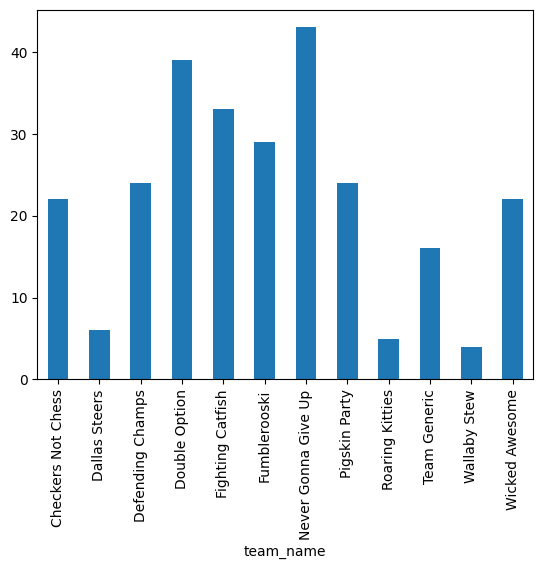

In [31]:
grouped_df.plot(kind="bar")